# Задание 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.DataFrame({
    'День': ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница'],
    'Улица': [80, 98, 75, 91, 78],
    'Гараж': [100, 82, 105, 89, 102]
})
df

,День,Улица,Гараж
0,Понедельник,80,100
1,Вторник,98,82
2,Среда,75,105
3,Четверг,91,89
4,Пятница,78,102


# Задание 1.1


In [ ]:
# Расчет корреляции Пирсона
var1 = df['Улица'].to_numpy()
var2 = df['Гараж'].to_numpy()
correlation = np.corrcoef(var1, var2)[0, 1]
print(f"Коэффициент корреляции Пирсона: {correlation:.4f}")

Коэффициент корреляции Пирсона: -1.0000


# Задание 1.2


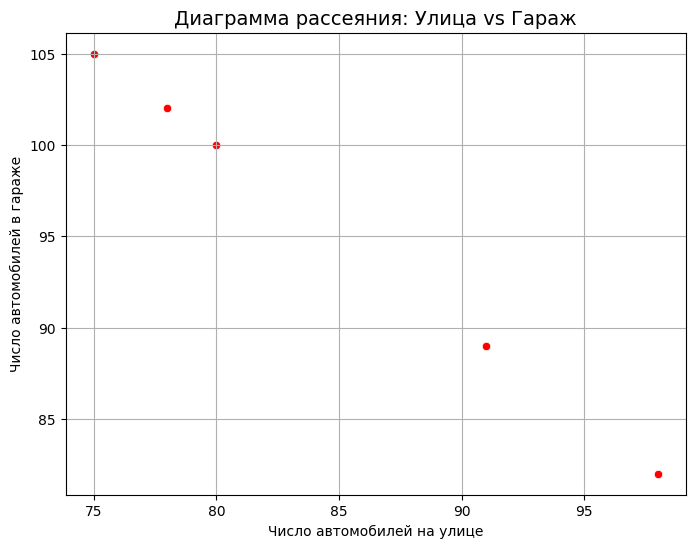

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=var1, y=var2, color='r')
plt.grid(True)
plt.title('Диаграмма рассеяния: Улица vs Гараж', fontsize=14)
plt.xlabel('Число автомобилей на улице')
plt.ylabel('Число автомобилей в гараже')
plt.grid(True)
plt.show()

# Задание 2

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# kirillkim71
# 39d1b74c7680ac8e32302e0efa5ae562

In [ ]:
import opendatasets as od


od.download('https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction')

Skipping, found downloaded files in "./mobile-price-prediction" (use force=True to force download)


In [ ]:
df2 = pd.read_csv('/content/mobile-price-prediction/Cellphone.csv')
df2

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [ ]:
df2.isnull().sum()

,0
Product_id,0
Price,0
Sale,0
weight,0
resoloution,0
ppi,0
cpu core,0
cpu freq,0
internal mem,0
ram,0


In [ ]:
df2.duplicated().sum()

np.int64(0)

In [ ]:
scaler = StandardScaler()
col = df2.columns
result = scaler.fit_transform(df2)
df2 = pd.DataFrame(result, columns=col)
df2

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,-1.153783,0.184649,-0.396590,-0.382572,-0.006602,0.661751,1.289952,-0.255608,-0.296070,0.495385,0.425444,0.807868,-0.170327,-0.696211
1,0.499156,-0.609294,-0.396590,-0.490564,-0.803808,-0.759303,-1.172684,-0.339231,-0.713968,-0.750857,-1.172970,-1.040327,-0.838100,0.447564
2,-1.551758,-0.391221,-0.396590,-0.652552,-0.338771,-0.171538,-0.351805,-0.506479,-0.574669,-0.439297,0.425444,0.114795,-0.617955,-0.604709
3,-1.407705,-1.176024,-0.395942,-0.560759,-0.803808,-0.759303,-1.172684,-0.339231,-0.713968,-1.054940,-1.172970,-1.040327,-1.058245,0.950825
4,0.499156,-0.609294,-0.395942,-0.490564,-0.803808,-0.759303,-1.172684,-0.339231,-0.713968,-0.750857,-1.172970,-1.040327,-0.838100,0.447564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.295105,1.743807,2.605081,0.081792,0.166126,1.509919,-0.351805,0.622440,3.604306,2.364749,0.263169,2.656063,0.908383,-0.238701
157,1.514846,1.299826,4.796015,-0.004601,0.192699,1.480159,-0.351805,0.789688,3.604306,2.364749,1.561373,0.807868,0.409387,-0.467456
158,0.440558,1.363811,5.310347,-0.220585,0.192699,0.490629,1.289952,1.165994,1.375519,1.118506,1.561373,3.580160,0.115861,-0.970717
159,1.514846,1.299826,5.399203,-0.004601,0.192699,1.480159,-0.351805,0.789688,3.604306,2.364749,1.561373,0.807868,0.409387,-0.467456


# Задание 2.1

In [ ]:
corr_matrix = df2.corr().Price.abs().to_frame()
corr_matrix

,Price
Product_id,0.165136
Price,1.000000
Sale,0.273263
weight,0.144555
resoloution,0.404010
ppi,0.817614
cpu core,0.686811
cpu freq,0.727383
internal mem,0.776738
ram,0.896915


<Axes: >

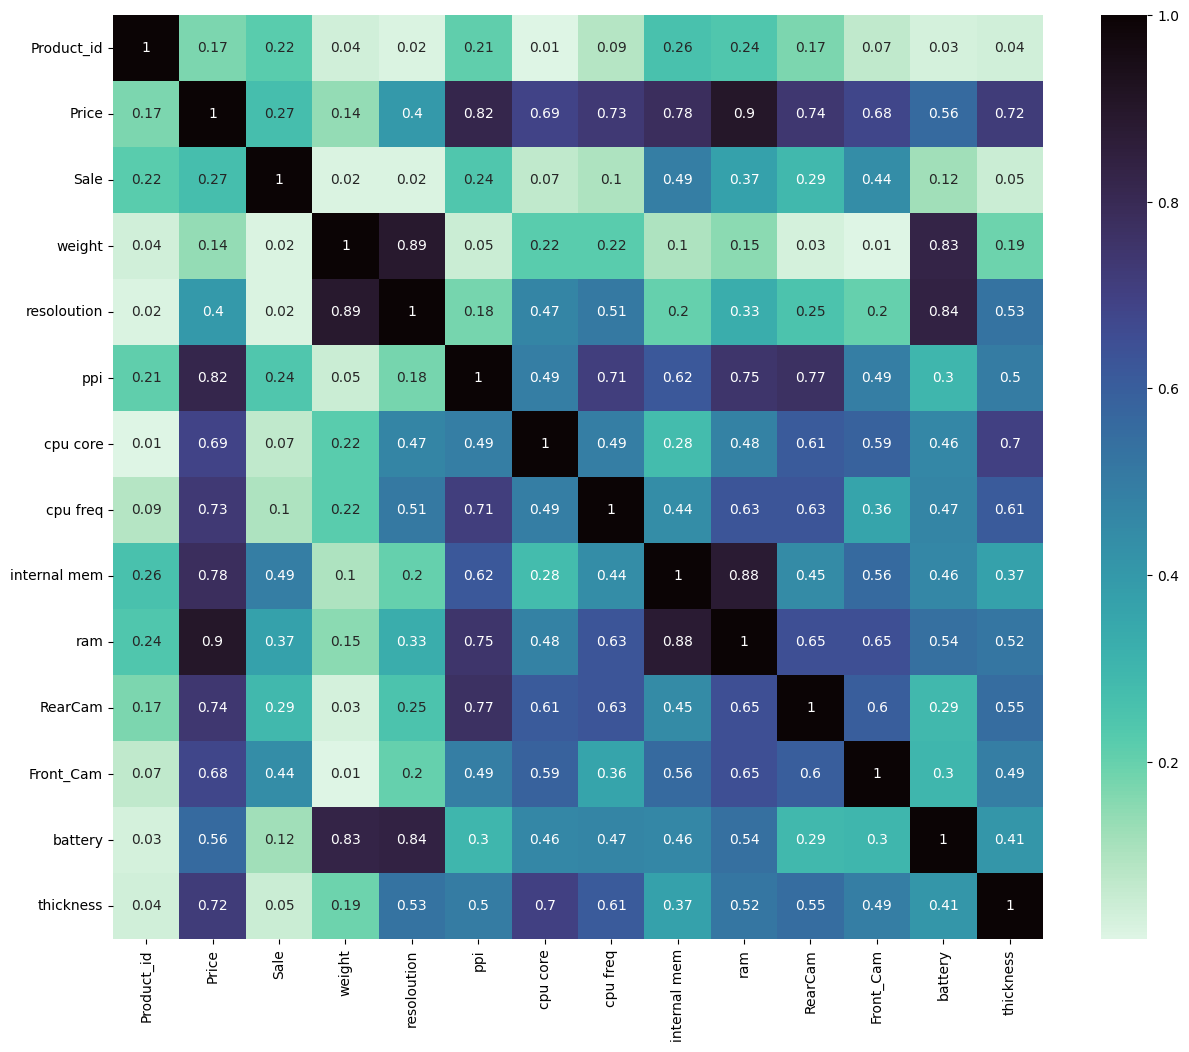

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(round(df2.corr(), 2).abs(), annot=True, cmap='mako_r')

# Задание 2.2

In [ ]:
def mse(X, w1, w0, y):
    y_pred = w1 * X + w0
    return np.mean((y - y_pred) ** 2)

def grad(X, w1, w0, y):
    y_pred = w1 * X + w0
    error = y - y_pred
    n = len(y)

    grad_w0 = -2 * np.mean(error)
    grad_w1 = -2 * np.mean(error * X)

    return np.array([grad_w0, grad_w1])

In [ ]:
X_data = df2[['ram']].values.flatten()
y_data = df2['Price'].values

In [ ]:
eps = 0.0001
lr = 0.01
w1, w0 = 0, 0

mse_history = []
w1_history = []
w0_history = []

# Градиентный спуск
n = 10000
for i in range(n):
    current_w1, current_w0 = w1, w0

    # Вычисляем градиент
    gradient = grad(X_data, current_w1, current_w0, y_data)

    # Обновляем веса
    w0 = current_w0 - lr * gradient[0]
    w1 = current_w1 - lr * gradient[1]

    # Вычисляем MSE
    current_mse = mse(X_data, current_w1, current_w0, y_data)
    mse_history.append(current_mse)
    w1_history.append(current_w1)
    w0_history.append(current_w0)

    # Вывод прогресса каждые 1000 итераций
    if i % 1000 == 0:
        print(f"Итерация {i}: MSE = {current_mse:.6f}, w1 = {current_w1:.6f}, w0 = {current_w0:.6f}")

    # Критерий остановки
    if (abs(w1 - current_w1) < eps and abs(w0 - current_w0) < eps):
        print(f"Сходимость достигнута на итерации {i}")
        break

final_w1, final_w0 = w1, w0
final_mse = mse(X_data, final_w1, final_w0, y_data)

print(f"w1 = {final_w1:.6f}, w0 = {final_w0:.6f}")
print(f"MSE: {final_mse:.6f}")
print(f"y = {final_w1:.4f} * x + {final_w0:.4f}")

Итерация 0: MSE = 1.000000, w1 = 0.000000, w0 = 0.000000
Сходимость достигнута на итерации 257
w1 = 0.892028, w0 = -0.000000
MSE: 0.195567
y = 0.8920 * x + -0.0000


In [ ]:
# Сравнение с sklearn

# Модель sklearn на одном признаке (ram)
X_ram = df2[['ram']]
y = df2['Price']

model_simple = LinearRegression()
model_simple.fit(X_ram, y)

print(f"Ручная модель:  y = {final_w1:.4f}x + {final_w0:.4f}")
print(f"Sklearn модель: y = {model_simple.coef_[0]:.4f}x + {model_simple.intercept_:.4f}")

Ручная модель:  y = 0.8920x + -0.0000
Sklearn модель: y = 0.8969x + -0.0000


In [ ]:
# Предсказания
y_pred_manual = final_w1 * X_data + final_w0
y_pred_sklearn_simple = model_simple.predict(X_ram)

# MSE для сравнения
mse_manual = mse(X_data, final_w1, final_w0, y_data)
mse_sklearn_simple = mean_squared_error(y, y_pred_sklearn_simple)

print(f"MSE ручной модели: {mse_manual:.6f}")
print(f"MSE sklearn (ram): {mse_sklearn_simple:.6f}")

MSE ручной модели: 0.195567
MSE sklearn (ram): 0.195543


In [ ]:
# Модель sklearn на всех признаках
X_all = df2.drop('Price', axis=1)
y_all = df2['Price']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

model_all = LinearRegression()
model_all.fit(X_train, y_train)

y_pred_all = model_all.predict(X_test)
mse_all = mean_squared_error(y_test, y_pred_all)

print(f"MSE sklearn (все признаки): {mse_all:.6f}")

MSE sklearn (все признаки): 0.039449


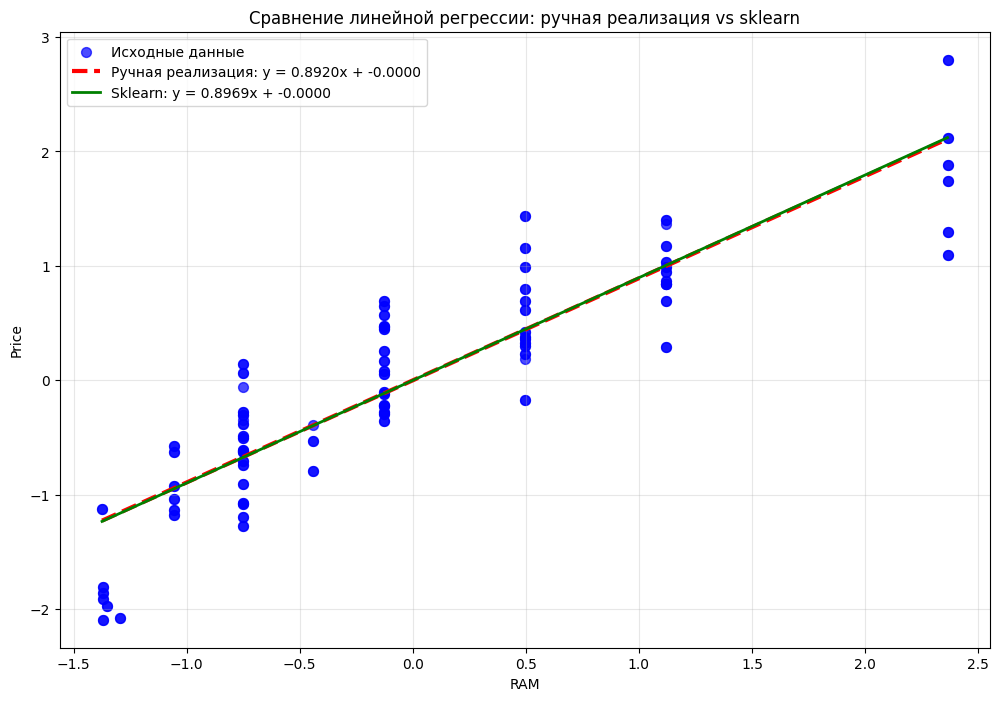

Ручная реализация: y = 0.892028x + -0.000000
Sklearn:           y = 0.896915x + -0.000000
MSE ручной:  0.195567
MSE sklearn: 0.195543


In [ ]:
# Визуализация линейной регрессии: сравнение ручной реализации и sklearn
plt.figure(figsize=(12, 8))

# Данные
plt.scatter(X_data, y_data, alpha=0.7, color='blue', label='Исходные данные', s=50)

# Сортируем данные для гладких линий
sorted_indices = np.argsort(X_data)
X_sorted = X_data[sorted_indices]

# Линия ручной модели (градиентный спуск)
y_manual_sorted = final_w1 * X_sorted + final_w0
plt.plot(X_sorted, y_manual_sorted, '--', linewidth=3, color='red',
         label=f'Ручная реализация: y = {final_w1:.4f}x + {final_w0:.4f}')

# Линия sklearn
y_sklearn_sorted = model_simple.coef_[0] * X_sorted + model_simple.intercept_
plt.plot(X_sorted, y_sklearn_sorted, linewidth=2, color='green',
         label=f'Sklearn: y = {model_simple.coef_[0]:.4f}x + {model_simple.intercept_:.4f}')

plt.xlabel('RAM')
plt.ylabel('Price')
plt.title('Сравнение линейной регрессии: ручная реализация vs sklearn')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Ручная реализация: y = {final_w1:.6f}x + {final_w0:.6f}")
print(f"Sklearn:           y = {model_simple.coef_[0]:.6f}x + {model_simple.intercept_:.6f}")
print(f"MSE ручной:  {mse_manual:.6f}")
print(f"MSE sklearn: {mse_sklearn_simple:.6f}")

# Задание 3

In [ ]:
df3 = pd.read_csv("insurance.csv")
df3

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df3.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df3.duplicated().sum()

np.int64(1)

In [ ]:
df3['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Задание 3.1

In [ ]:
!pip install scipy

In [ ]:
from scipy.stats import f_oneway
df3_anova = df3[['region', 'bmi']]
groups = df3_anova.groupby('region').groups

southwest = groups['southwest']
southeast = groups['southeast']
northwest = groups['northwest']
northeast = groups['northeast']

f_stat, p_value = f_oneway(southeast, southwest, northeast, northwest)
print(f"One-way ANOVA: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")

One-way ANOVA: F-statistic = 0.3467, p-value = 0.7915


# Задание 3.2

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_model = ols('bmi ~ region', data=df3).fit()
anova_result = sm.stats.anova_lm(anova_model, typ=2)
anova_result

,sum_sq,df,F,PR(>F)
region,4055.880631,3.0,39.495057,1.881839e-24
Residual,45664.319755,1334.0,NaN,NaN


# Задание 3.3

In [ ]:
regions = ['southwest', 'southeast', 'northwest', 'northeast']
region_pair = []

from itertools import combinations
from scipy.stats import ttest_ind

for region1, region2 in combinations(regions, 2):

    group1 = df3[df3['region'] == region1]['bmi']
    group2 = df3[df3['region'] == region2]['bmi']

    t_stat, p_value = ttest_ind(group1, group2)
    region_pair.append(
        {
            'Region 1': region1,
            'Region 2': region2,
            'T-Statistic': t_stat,
            'P-Value': p_value
        }
    )

results_df = pd.DataFrame(region_pair)

alpha = 0.05
results_df['P-Value (Bonferroni Corrected)'] = results_df['P-Value'] * len(region_pair)

results_df['P-Value (Bonferroni Corrected)'] = results_df['P-Value (Bonferroni Corrected)'].apply(lambda x: "{:.10f}".format(x))
results_df

,Region 1,Region 2,T-Statistic,P-Value,P-Value (Bonferroni Corrected)
0,southwest,southeast,-5.908374,5.437401e-09,0.0000000326
1,southwest,northwest,3.284417,1.076958e-03,0.0064617510
2,southwest,northeast,3.116900,1.908616e-03,0.0114516970
3,southeast,northwest,9.256490,2.643571e-19,0.0000000000
4,southeast,northeast,8.790906,1.186015e-17,0.0000000000
5,northwest,northeast,0.060308,9.519292e-01,5.7115750249


# Задание 3.4

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.1552,1.2078,False
northeast,southeast,4.1825,0.0,3.033,5.332,True
northeast,southwest,1.4231,0.0107,0.2416,2.6046,True
northwest,southeast,4.1562,0.0,3.0077,5.3047,True
northwest,southwest,1.3968,0.0127,0.2162,2.5774,True
southeast,southwest,-2.7594,0.0,-3.9079,-1.6108,True


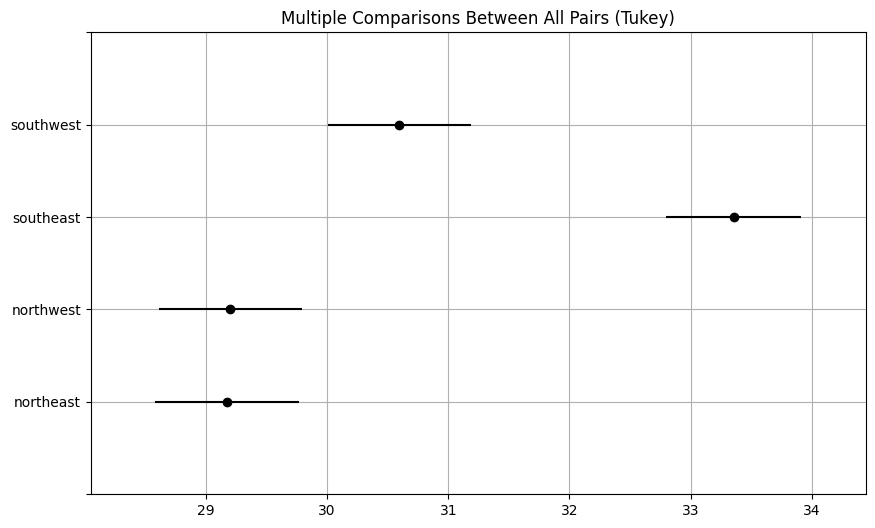

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df3['bmi'].values, groups=df3['region'], alpha=0.05)

tukey.plot_simultaneous()
plt.vlines(x=49.57, ymin=-0.5, ymax=4.5, color="red")
plt.grid()
tukey.summary()

# Задание 3.5

In [ ]:
model = ols('bmi ~ C(region) * C(sex)', data=df3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(region),4034.975135,3.0,39.398134,2.163195e-24
C(sex),86.007035,1.0,2.519359,1.126940e-01
C(region):C(sex),174.157808,3.0,1.700504,1.650655e-01
Residual,45404.154911,1330.0,NaN,NaN
